# Additional Regression Plots

In this last lecture on visualizing Regression plots, we shall be discussing few other types of plots like **Pairplot** and revisit additional use cases of plots that we've already covered like **Lmplot**.Since Regression is no new topic for us, let us quickly get into exploring but before we do that, as always we shall make few necessary imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn')
sns.set(style="ticks", color_codes=True)


# Let us also get tableau colors we defined earlier:
tableau_20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scaling avove RGB values to [0, 1] range, which is Matplotlib acceptable format:
for i in range(len(tableau_20)):
    r, g, b = tableau_20[i]
    tableau_20[i] = (r / 255., g / 255., b / 255.)

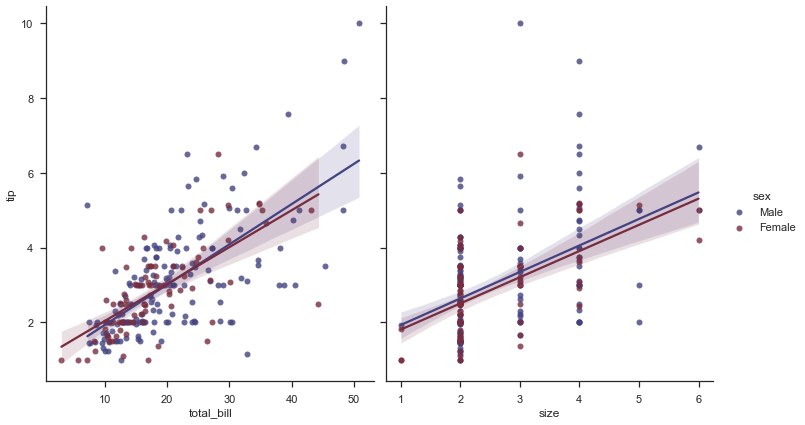

In [2]:
# Loading Built-in Dataset:
tips = sns.load_dataset("tips")
# tips.head(2)

# Plotting a simple Jointplot:
sns.pairplot(data=tips, hue="sex", palette="icefire", x_vars=["total_bill", "size"], y_vars=["tip"], size=6, aspect=.85, kind="reg")

Let us begin with our discussion *parameters* in this **Pairplot**:

`sns.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)`

While `data` parameter helps us in specifying the dataset in Pandas DataFrame, on the other hand, variables `x_vars` and `y_vars` are used separately for the *rows* and *columns* of the figure; i.e. to make a non-square plot. `size` determines *height*, `aspect` determines *width* & finally `kind` determines whether to get *Scatter* or *regression* in grids.

And before I proceed further, let me giveaway a set of `palette` options that you can use with Seaborn. It is not so easy to find all of them listed for you anywhere on internet (atleast I couldn't find), so I have compiled a list for you guys to play around with and use at your workplace or in your project/assignments for your plots to look awesome. You shall also find attached a Notebook with these color options in your Resource folder, in case you require.

**Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r**

Let us now check out **Pairplots** on a bigger scale and to do that let us get our *Iris dataset*, just for a change:

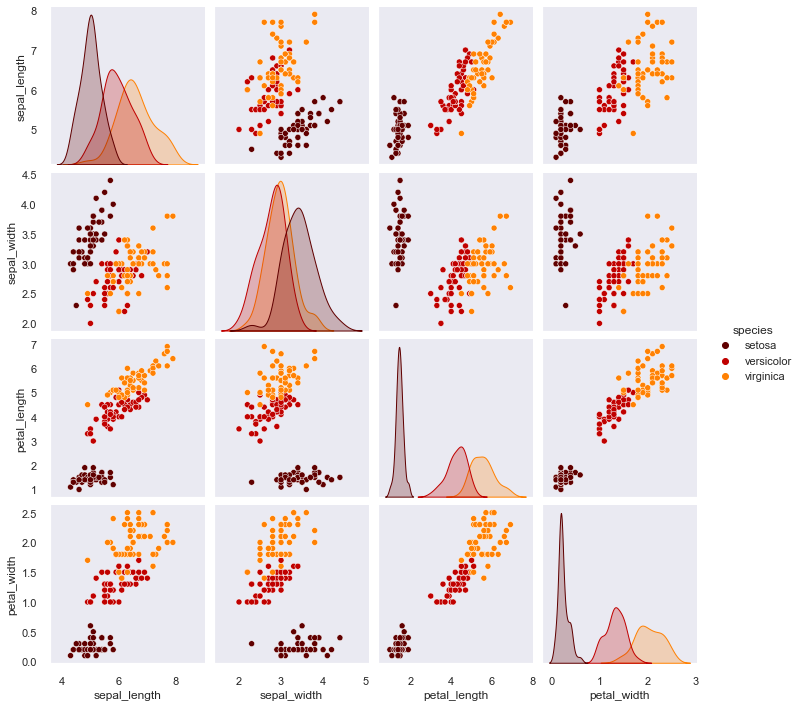

In [3]:
iris = sns.load_dataset("iris")
# iris.columns
sns.set(style="dark")

sns.pairplot(iris, hue="species", palette="gist_heat", dropna=True)

Here what we plot is a grid with **4*4** linear relationship between each feature of our *Iris* dataset, with visual separation using `hue` factor of **species** feature. This is a plot which generally is out first pick for any dataset to understand the correlation on a single grid. You may notice **Histograms** being plotted diagonally when the features are correlated with each other. Rest of the individual plots remain to be **Scatterplots** that we discussed in detail earlier as well. There is a **legend** indicating the separation based on the *color*. The **axes** have **ticks** because earlier we had set the **style** so.

Let me also give you a *preview* to something known as **Pairgrid** which is actually the basis of our Pairplot. So, we are going to just look at it as of now and *feel the difference* or better to say, we're just going to explore the potential of **Pairplot** for now and then delve deeper into **PairGrid** later in this course. And, to this we shall conttinue on our Iris dataset:

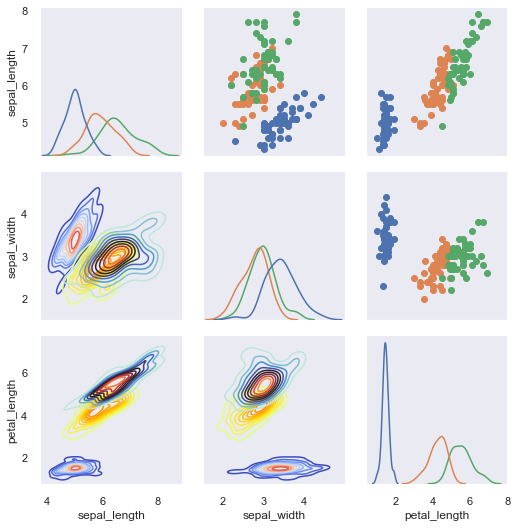

In [4]:
from itertools import cycle
sns.set(style="dark")

def make_kde(*args, **kwargs):    
    sns.kdeplot(*args, cmap=next(make_kde.cmap_cycle), **kwargs)

make_kde.cmap_cycle = cycle(('coolwarm', 'Wistia', 'icefire'))

our_plot = sns.PairGrid(iris, vars=('sepal_length', 'sepal_width', 'petal_length'), hue='species', dropna=True)
our_plot.map_diag(sns.kdeplot)
our_plot.map_lower(make_kde)
our_plot.map_upper(plt.scatter)

To give you a fair bit of an idea, here we *cycled* through the *list of color maps* stored in the `cmap_cycle` attribute attached to the `make_kde` function. And Python programmers know that this isn't actually the best way to use **function** attributes, so that bit of customization I shall leave as a homework. Overall it helps us achieve a *pair-wise relationship* between features using **PairGrid** and **Pairplot**; and simultaneously allows us to plot different types of plot like **Kernel Density Contours**, **Scatterplot**, etc. for our needs.

## Residplot():

So now let us quickly cover a very small topic here, i.e. **Residplot** and once done with this, I shall again show you a small demo of **PairGrid**, and include *Residplot* in this one. So, let's plot our first **Residplot** and understand wat it does for us.

And this time let us generate some random data using our function we previously created in the very first lecture of Linear Regression plots. If you can't recollect, it is okay, as I am going to paste the code here as well for your reference.

In [5]:
def generatingData():
    num_points =1500
    category_points =[]
    
    for i in range(num_points):
        if np.random.random()>0.5:
            x,y = np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)
            category_points.append([x,y])
        else:
            x, y = np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)
            category_points.append([x, y])
            
    df =pd.DataFrame({'x':[v[0] for v in category_points], 'y':
                      [v[1] for v in category_points]})
    
    sns.residplot('x', 'y', data=df, lowess=True, color="r")
    plt.show()

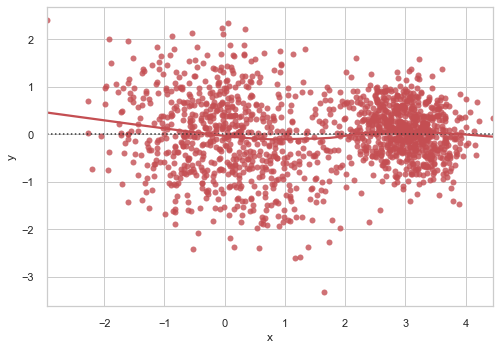

In [6]:
sns.set(style="whitegrid")

generatingData()

This **Residplot** is a plot of the *residuals* after fitting a *linear model*. This function is something we had established in our previous lecture of **Matplotlib v/s Seaborn** so all we need to alter is the type of model we want, along with **lowess** parameter. If `lowess` parameter is set to `TRUE`, then it uses [statsmodels](https://www.statsmodels.org/stable/index.html) to estimate a **nonparametric lowess** model, indicating a **locally weighted linear regression** model. 

Important to note is that **confidence intervals** cannot currently be drawn for this kind of model or even for [Regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html).

There isn't much to talk about **Residplot** and it isn't quite often that you are going to use them in production, (at least I haven't used till date) but it is again good to know what Seaborn has in stock to offer. So as promised let me show you another example of **PairGrid** with reference to *Residplot* as it shall help you implement if ever required in your work. Again, we shall be not discussing in detail and instead just try to focus on visualization aspect of it. Let's plot:

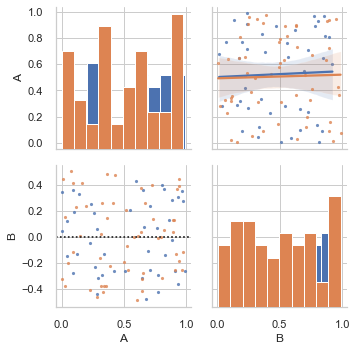

In [7]:
np.random.seed(42)

sample = 100
categories = pd.DataFrame(np.array(["p","q"])[np.random.randint(0,2,size=[sample,1])], columns=["cat"], dtype="object")
data = pd.DataFrame(np.random.rand(sample, 2), columns=list('AB'))
df = pd.concat([data,categories], axis=1)

g = sns.PairGrid(df, hue="cat")
g.map_diag(plt.hist)

g.map_upper(sns.regplot, scatter_kws={'s':10})

def f(*args, **kwargs): 
    if 'scatter_kws' in kwargs.keys():
        kwargs['scatter_kws'].update({"color": kwargs.pop("color")})
    sns.residplot(*args,**kwargs)
g.map_lower(f, scatter_kws={'s':10})

Here we generate some random data and create a *pairplot* of it, ensuring a smaller than default size of our data points which also have separate color coding.

Now, let us try to use built-in **Anscombe's dataset** to create a *linear regression* plot on these quartet grid; and to achieve this we're going to use what you're already familiar with, i.e. **Lmplot()**:

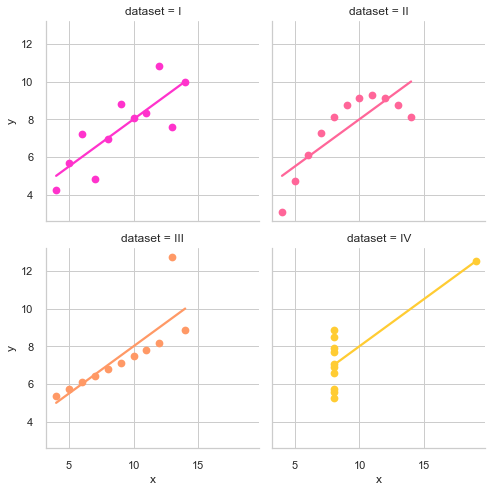

In [8]:
df = sns.load_dataset("anscombe")

sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df, col_wrap=2, ci=None, palette="spring", size=3.5, scatter_kws={"s": 60, "alpha": 1})

With this quartet, we have a result of the results of a linear regression within each dataset. If you urge to explore the dataset more, feel free to load it and check various other possibilities to wrangle; and honestly I shall highly recommend it as well because there is no better way of learning.

We're going to end this lecture here and this pretty much brings us to the end of Linear Regression possibilities in general. I hope you are enjoying the shine and mileage that Seaborn adds to our presentation and hope to see you soon in our next lecture where we shall be discussing few other plots which deal quite heavily with **categorical data**, that is commonly seen across. Till then, Happy Visualizing!